# Graph transversals

## Breadth-first search

In [1]:
import os

if not os.path.exists("./data/graph-small"):
    os.makedirs("./data/graph-small")

In [2]:
%%bash

wget -qO "./data/graph-small/graph.txt" "https://github.com/memgraph/graph-analytics-course/raw/master/lecture-3/graph-transversals/graph.txt"

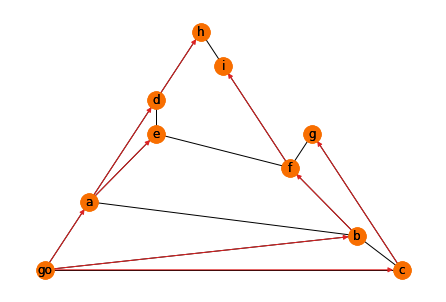

In [3]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

with open("./data/graph-small/graph.txt") as f:
    lines = f.readlines()
    
g = nx.Graph()
edgeList = [line.strip().split() for line in lines]
g.add_edges_from(edgeList)

pos = nx.planar_layout(g)
nx.draw(g, pos, with_labels=True, node_color="#f86e00")

bfs = nx.bfs_tree(g, source="go")
nx.draw(bfs, pos, with_labels=True, node_color="#f86e00", edge_color="#dd2222")
plt.show()

## Depth-first search

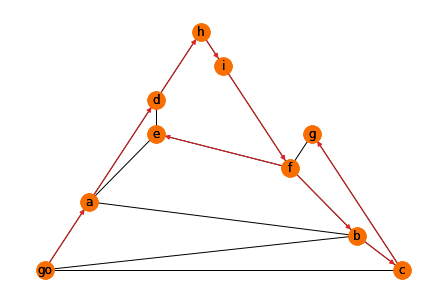

In [4]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

with open("./data/graph-small/graph.txt") as f:
    lines = f.readlines()
    
g = nx.Graph()
edgeList = [line.strip().split() for line in lines]
g.add_edges_from(edgeList)

pos = nx.planar_layout(g)
nx.draw(g, pos, with_labels=True, node_color="#f86e00")

dfs = nx.dfs_tree(g, source="go")
nx.draw(dfs, pos, with_labels=True, node_color="#f86e00", edge_color="#dd2222")
plt.show()

## Path finding algorithms

### Dijkstra's algorithm

In [5]:
%%bash

wget -qO ./data/graph-small/graph-weighted.txt "https://github.com/memgraph/graph-analytics-course/raw/master/lecture-3/path-finding/graph-weighted.txt"

The shortest path from GO to I is  ['go', 'b', 'f', 'i'] with length of: 16
The shortest path from GO to each node is: 
{'a': ['go', 'a'],
 'b': ['go', 'b'],
 'c': ['go', 'c'],
 'd': ['go', 'a', 'd'],
 'e': ['go', 'a', 'e'],
 'f': ['go', 'b', 'f'],
 'g': ['go', 'b', 'f', 'g'],
 'go': ['go'],
 'h': ['go', 'a', 'd', 'h'],
 'i': ['go', 'b', 'f', 'i']}
{'go': 0, 'b': 6, 'a': 7, 'c': 8, 'e': 10, 'f': 11, 'd': 12, 'g': 14, 'i': 16, 'h': 18}


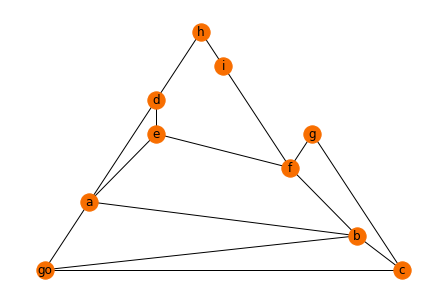

In [6]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import pprint as pp

g = nx.read_edgelist("./data/graph-small/graph-weighted.txt", nodetype=str,
    data=(("weight", int),), create_using=nx.Graph())
pos = nx.planar_layout(g)
nx.draw(g, pos, with_labels=True, node_color="#f86e00")

p1to6 = nx.shortest_path(g, source="go", target="i", weight="weight")
length = nx.shortest_path_length(g, source="go", target="i", weight="weight")
print("The shortest path from GO to I is ", p1to6, "with length of:", length)

p1 = nx.shortest_path(g, source="go", weight="weight")
lengths = nx.shortest_path_length(g, source="go", weight="weight")
print("The shortest path from GO to each node is: ")
results = {a: list(b) for a, b in p1.items()}
pp.pprint(results)
print(lengths)

plt.show()

## Centrality measures

### Degree centrality

In [7]:
%%bash

wget -qO "./data/graph-small/graph.gexf" "https://github.com/memgraph/graph-analytics-course/raw/master/dataset/graph-small/graph.gexf"

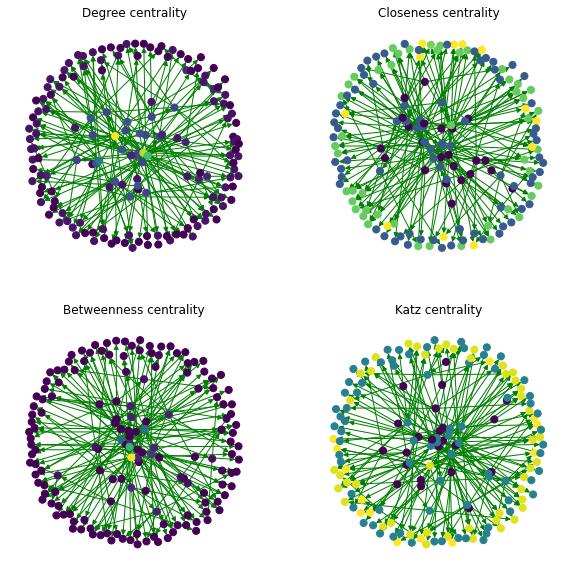

In [27]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

G = nx.read_gexf("./data/graph-small/graph.gexf")

def draw_network(G, layout, colors, position, draw_labels, title):
    ax = plt.subplot(position)
    ax.title.set_text(title)
    
    nx.draw(G, pos=layout, node_size=50, node_color=colors, edge_color="g")
    
    if draw_labels:
        node_labels = nx.get_node_attributes(G, "label")
        nx.draw_networkx_labels(G, pos=layout, labels=node_labels)

plt.figure(figsize=(10, 10))
centrality = nx.degree_centrality(G)
colors = list(centrality.values())
draw_network(G, nx.spring_layout(G), colors, 221, draw_labels=False, 
    title="Degree centrality")

centrality = nx.closeness_centrality(G)
colors = list(centrality.values())
draw_network(G, nx.spring_layout(G), colors, 222, draw_labels=False,
    title="Closeness centrality")

centrality = nx.betweenness_centrality(G)
colors = list(centrality.values())
draw_network(G, nx.spring_layout(G), colors, 223, draw_labels=False,
    title="Betweenness centrality")

centrality = nx.katz_centrality(G)
colors = list(centrality.values())
draw_network(G, nx.spring_layout(G), colors, 224, draw_labels=False,
    title="Katz centrality")

plt.show()

### PageRank

In [14]:
%%bash

wget -qO "./data/graph-small/graph-pagerank.txt" "https://github.com/memgraph/graph-analytics-course/raw/master/lecture-3/centralities/graph-pagerank.txt"

{'A': 0.40807451434675573,
 'B': 0.0796742623281056,
 'C': 0.13704946318948702,
 'D': 0.13704946318948702,
 'E': 0.021428571428571432,
 'F': 0.0796742623281056,
 'G': 0.13704946318948702}


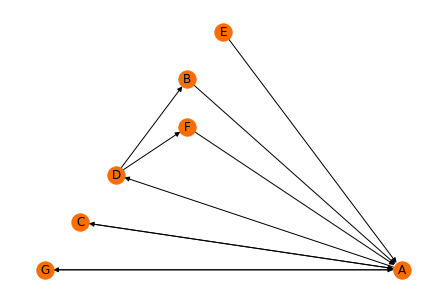

In [23]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import pprint as pp

with open("./data/graph-small/graph-pagerank.txt") as f:
    lines = f.readlines()
    
edgeList = [line.strip().split() for line in lines]

G = nx.DiGraph()
G.add_edges_from(edgeList)

ppr = nx.pagerank(G)
pp.pprint(ppr)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_color="#f86e00")
plt.show()

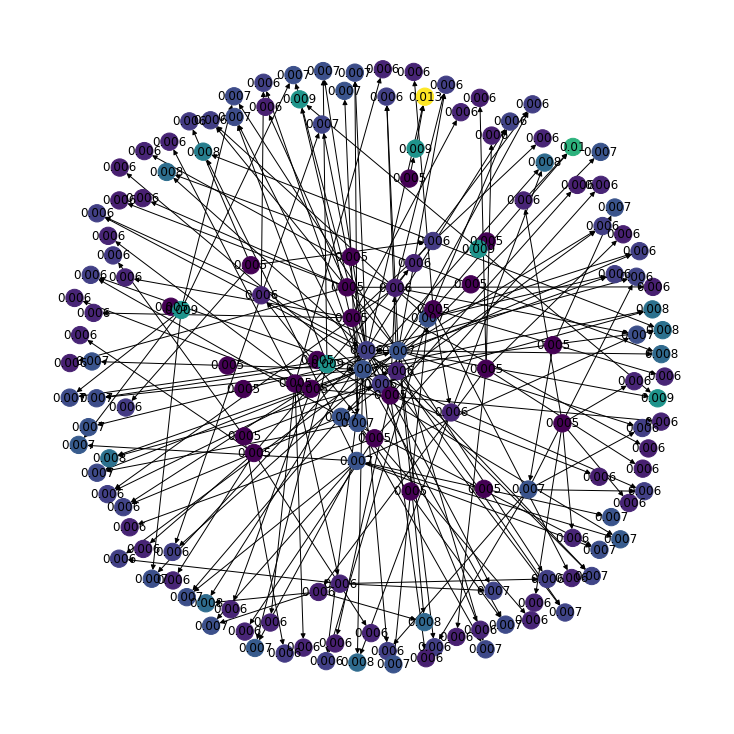

In [30]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

G = nx.read_gexf("./data/graph-small/graph.gexf")
pagerank = nx.pagerank(G)

for node_id in G.nodes:
    G.nodes[node_id]['pagerank'] = round(pagerank[node_id], 3)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
colors = list(pagerank.values())
nx.draw(G, pos, node_color=colors)
node_labels = nx.get_node_attributes(G, "pagerank")
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.show()